# 0. Importing all necessary libraries and packages.

In [1]:
#importing the required libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import math

# 1. Importing data and all necessary data preprocessing


In [2]:
data = pd.read_csv('/content/ratings.csv')
data.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
data.drop(columns='timestamp')

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [4]:
Movie = data["movieId"]
maxmovie = Movie.max()
User = data["userId"]
maxuser = User.max()
rating = data["rating"]
num_movieid = len(pd.unique(data['movieId']))
uniquemid = list(dict.fromkeys(Movie))
Mid = [uniquemid.index(id) for id in Movie]
data['Mid'] = Mid
print(maxuser)
print(maxmovie)
print(num_movieid)


610
193609
9724


In [5]:
M = np.zeros((maxuser, num_movieid)) 

In [6]:
#df = [[0 for x in range(maxmovie)] for y in range(maxuser)]
#for index in range(100836):
#  x=User[index]-1
#  y=Movie[index]-1
#  c =rating[index]
#  df[x][y] += c
# a =  np.argwhere(np.all(df[..., :] == 0, axis=0))
# M = np.delete(df, a, axis=1)
#M = pd.DataFrame(df)
#M = M.loc[:, (M != 0).any(axis=0)]
#M = df
#M.shape

In [7]:
for row in data.iterrows():
  M[int(row[1]['userId'] -1)][int(row[1]['Mid'])] = row[1]['rating']
M

array([[4. , 4. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 0. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 5. , ..., 3. , 3.5, 3.5]])

In [8]:
rowindex, colindex = [], []
for i in range(maxuser):
  for j in range(len(M[0])):
    if M[i][j] != 0 :
      rowindex.append(i)
      colindex.append(j)

omega = np.vstack((rowindex, colindex)).T
print(omega.shape)
omega

(100836, 2)


array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [ 609, 9721],
       [ 609, 9722],
       [ 609, 9723]])

In [9]:
omega1, omega2 = train_test_split(omega, test_size = 0.1, random_state = 42)
print(omega1.shape)
print(omega2.shape)

(90752, 2)
(10084, 2)


#### Normalizing the rating matrix such that all the ratings are between 0 and 1. 

In [10]:
Mmax, Mmin = M.max(), M.min()
M = (M - Mmin)/(Mmax-Mmin)
M

array([[0.8, 0.8, 0.8, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0.4, 0. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 1. , ..., 0.6, 0.7, 0.7]])

# 2. Learning

###1) Initializing U and V matrices 

In [11]:
d = 5
UI = np.random.randn(maxuser, d)
VI = np.random.randn(num_movieid,d)
print(UI)
print(VI)

[[-0.82849238 -0.39418375 -0.09636466  0.07081572 -0.26335394]
 [ 0.06767852  0.05852588 -1.8853518   0.29927526 -2.47288559]
 [ 0.37884343  0.3169231  -0.32332065  1.6555247  -1.08788258]
 ...
 [ 0.22460532  1.10493953  0.45104567 -0.89057827  0.46247837]
 [-0.94168167 -0.28509781  0.15071026  0.59063832 -0.2932407 ]
 [ 1.12073996  0.35169916 -0.620418   -0.73307331 -0.46432905]]
[[-0.34846693  2.6254266   0.11829188 -0.58962568  0.61582098]
 [-1.20201437 -0.61254466  0.9881364  -0.69625752 -1.01051547]
 [ 0.87592279 -0.15636844  0.05837885 -1.49471609 -1.75435501]
 ...
 [-1.31696784 -0.37986265 -0.45684062 -0.02934509 -0.55311104]
 [ 1.18770606 -1.09240234 -0.67398707  0.2511213   1.20167115]
 [-0.51322347 -0.28789964  0.35838468  1.3976983   1.25467457]]


### 2) Deriving gradient for F(U,V) with respect to U<sub>i</sub> and V<sub>j</sub>

In [12]:
def gradu(u,v,l,M):
  vt = np.transpose(v)
  prod_uv = np.dot(u,vt)
  x = np.subtract(prod_uv,M)
  prod_vx = np.dot(x,v)
  sum = np.add(prod_vx, (l*u))
  return sum

def gradv(u,v,l,M):
  ut = np.transpose(u)
  prod_uv = np.dot(v,ut)
  mt = np.transpose(M)
  x = np.subtract(prod_uv,mt)
  prod_ux = np.dot(x,u)
  sum = np.add(prod_ux, (l*v))
  return sum

### 3) Updating GD with a carefully chosen learning rate. 

In [13]:
learning_rate = 0.00001
iterations = 100
Finalu =[]
Finalv =[]
lambd = 1
U = UI
V = VI
for i in range(iterations):
  U = U - (learning_rate * gradu(U, V, lambd, M))
  V = V - (learning_rate * gradv(U, V, lambd, M))
  Finalu.append(U)
  Finalv.append(V)

print(np.shape(Finalu))
print(np.shape(Finalv))

(100, 610, 5)
(100, 9724, 5)


### 4) Calculation of the objective function. 
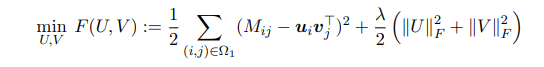

In [14]:
objectivefunc = []
sum = []
unorm = []
vnorm = []
for i in range(iterations):
  sum1 = 0
  for k,j in omega1:
    vt = np.transpose(Finalv[i][j])
    prod_uv = np.dot(Finalu[i][k], vt)
    sum1+= math.pow((M[k][j] - prod_uv),2)
  sum.append(sum1)
  un =  math.pow(np.linalg.norm(Finalu[i], ord='fro'),2)
  vn = math.pow(np.linalg.norm(Finalv[i], ord='fro'),2)
  unorm.append(un)
  vnorm.append(vn)
  x = (1/2 * sum[i]) + (lambd/2)*(unorm[i] + vnorm[i])
  objectivefunc.append(x)

print(np.shape(objectivefunc))

(100,)


### 5) Plotting objective function against number of iterations

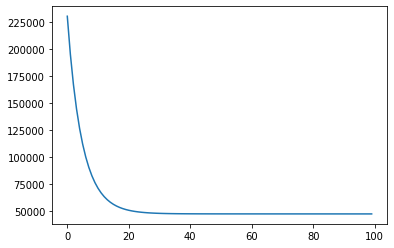

In [15]:
x = range(iterations)
plt.plot(x, objectivefunc)
plt.show()

###The objective function converges through the iterations. However it can be seen that after 20 iterations the change is not much.

# 3. Evaluation

### 1) Calculating Prediction matrix X = UV<sup>T</sup>


In [16]:
vt = np.transpose(Finalv[iterations-1])
u = Finalu[iterations-1]
X = np.dot(u,vt)

### 2) Evaluating the performance of prediction matric X using RMSE 
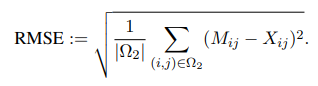

In [17]:
lenom2 = len(omega2)
summation = 0
for i,j in omega2:
  summation+= math.pow((M[i][j] - X[i][j]),2)
rmserror = math.sqrt((1/lenom2)*summation)
rmserror


0.7303074858820304

#### RMSE is 0.7303 when lambda = 1.

### 3) Learning and evaluating model for different values of Lambda

In [18]:
obj = []
rmse =[]
lambdas = [10**-6, 10**-3, 0.1,0.5,2,5,10,20,50,100,500,1000]
for lambd in lambdas:
  U = UI
  V = VI
  for i in range(iterations):
    U = U - (learning_rate * gradu(U, V, lambd, M))
    V = V - (learning_rate * gradv(U, V, lambd, M))
    sum1 = 0
    for k,j in omega1:
      vt = np.transpose(V[j])
      prod_uv = np.dot(U[k], vt)
      sum1+= math.pow((M[k][j] - prod_uv),2)  
    un =  math.pow(np.linalg.norm(U, ord='fro'),2)
    vn = math.pow(np.linalg.norm(V, ord='fro'),2)  
    x = (1/2 * sum1) + (lambd/2)*(un + vn)
    obj.append(x)
  vt = np.transpose(V)
  X = np.dot(U,vt)
  summation = 0
  for i,j in omega2:
    summation+= math.pow((M[i][j] - X[i][j]),2)
  rmserror = math.sqrt((1/lenom2)*summation)
  rmse.append(rmserror)

### 4) Plotting RMSE against different values of Lambda.

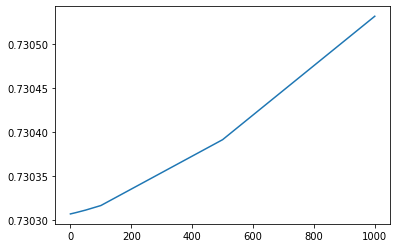

In [19]:
plt.plot(lambdas,rmse)
plt.show() 

#### From the above plot it can be seen that RMSE increases with the increase in the value of lambda. 